<a href="https://www.kaggle.com/code/chandnisdatainsights/sonar?scriptVersionId=194531488" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/connectionist-bench-sonar-mines-vs-rocks/sonar.all-data.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/kaggle/input/connectionist-bench-sonar-mines-vs-rocks/sonar.all-data.csv")
data.head(3)

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R


In [4]:
data.shape

(208, 61)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [6]:
data.describe()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


Clean data with no outliers or null values

In [7]:
matrix = data.iloc[:,:-1].corr()
matrix

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
Freq_1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
Freq_2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
Freq_3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
Freq_4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
Freq_5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
Freq_6,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
Freq_7,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
Freq_8,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
Freq_9,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
Freq_10,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


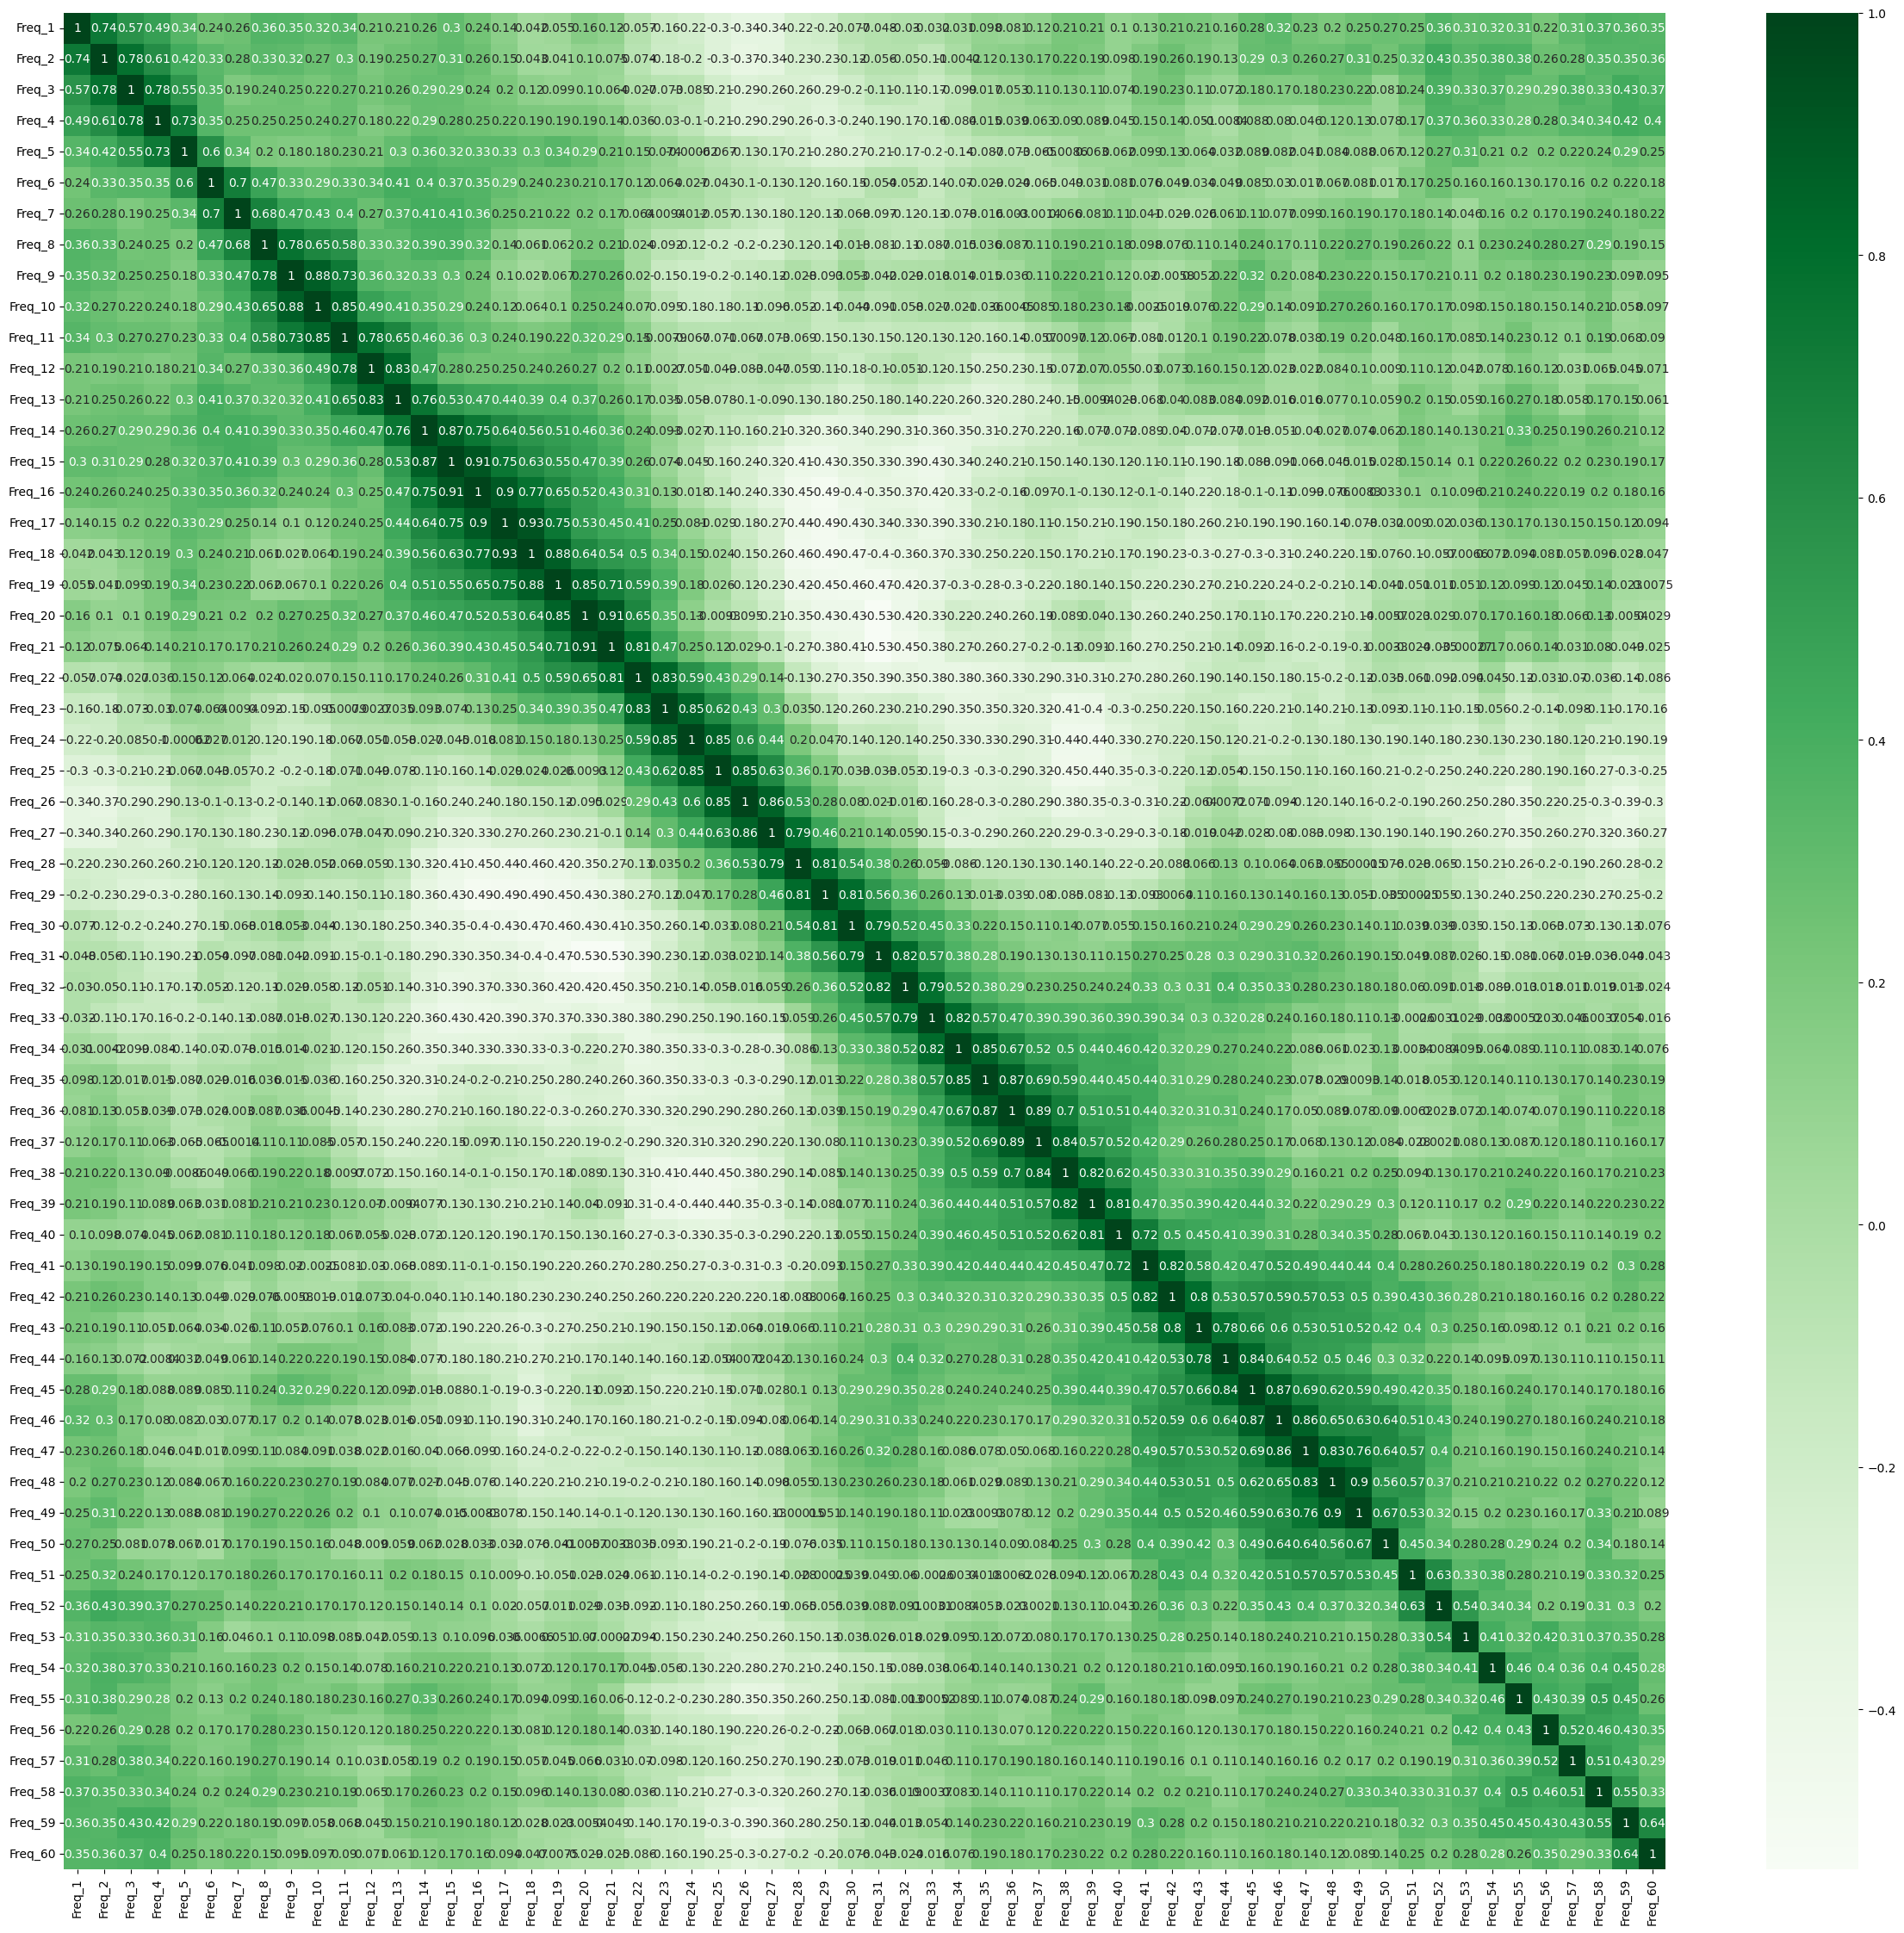

In [8]:
plt.figure(figsize=(30,28))
sns.heatmap(matrix, cmap='Greens', annot=True)
plt.show()

No significant correlation among the features

In [9]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [10]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='first', dtype=np.int32)

labels_train = ohe.fit_transform(y_train.values.reshape(-1,1))
labels_test = ohe.transform(y_test.values.reshape(-1,1))

y_train_encoded = pd.DataFrame(labels_train, columns = ohe.get_feature_names_out(['Label']))
y_test_encoded = pd.DataFrame(labels_test, columns = ohe.get_feature_names_out(['Label']))


* Logistic Regression
* Decision Tree
* Random Forest
* Support Vector Machine (SVM)
* Naive Bayes
* K-Nearest Neighbors (KNN)

In [11]:
labels_train.shape

(166, 1)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier

In [13]:
from sklearn.model_selection import RandomizedSearchCV

In [14]:
param_grid_logistic = {
    'C': [1, 0.1, 10],
    'penalty': ['l1', 'l2'],
    'solver' : ['liblinear', 'saga']
}

LogReg = LogisticRegression(max_iter=5000)

random_search_LogR = RandomizedSearchCV(
    estimator = LogReg,
    param_distributions = param_grid_logistic,
    cv=5,
    n_jobs=-1, 
    random_state = 42, 
    verbose = 3,
    n_iter = 50)


random_search_LogR.fit(X_train, labels_train.ravel()) #since 1d array expected
best_parameters_LogR = random_search_LogR.best_params_
print(f'Best Parameters for Logistic Regression: {best_parameters_LogR}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}


In [15]:
param_grid_DT = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

DTree = DecisionTreeClassifier()

random_search_DT = RandomizedSearchCV(
    estimator = DTree,
    param_distributions = param_grid_DT,
    cv=5,
    n_jobs=-1, 
    random_state = 42, 
    verbose = 3,
    n_iter = 50)


random_search_DT.fit(X_train, y_train_encoded)
best_parameters_DT = random_search_DT.best_params_
print(f'Best Parameters for Decision Tree : {best_parameters_DT}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 4/5] END .C=1, penalty=l1, solver=liblinear;, score=0.697 total time=   0.0s
[CV 1/5] END .C=1, penalty=l2, solver=liblinear;, score=0.735 total time=   0.0s
[CV 3/5] END .C=1, penalty=l2, solver=liblinear;, score=0.788 total time=   0.0s
[CV 5/5] END .C=1, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 2/5] END ......C=1, penalty=l2, solver=saga;, score=0.697 total time=   0.0s
[CV 1/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.529 total time=   0.0s
[CV 3/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.515 total time=   0.0s
[CV 2/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.545 total time=   0.0s
[CV 5/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.515 total time=   0.0s
[CV 3/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.667 total time=   0.0s
[CV 4/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.788 total time=   0.0s
[CV 1/5] END C=10, penalty=l1, solver=libli

In [16]:
param_grid_RF = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

RF = RandomForestClassifier()

random_search_RF = RandomizedSearchCV(
    estimator = RF,
    param_distributions = param_grid_RF,
    cv=5,
    n_jobs=-1, 
    random_state = 42, 
    verbose = 3,
    n_iter = 50)


random_search_RF.fit(X_train, labels_train.ravel())
best_parameters_RF = random_search_RF.best_params_
print(f'Best Parameters for Random Forest: {best_parameters_RF}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 3/5] END criterion=entropy, max_depth=None, max_features=None, min_samples_split=10;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=None, min_samples_split=10;, score=0.788 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, max_features=None, min_samples_split=10;, score=0.606 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=10;, score=0.758 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=10;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.727 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.697 total time=   0.6s
[CV 1/5] END criterion=en

In [17]:
param_grid_SVC = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [3, 4, 5],
    'gamma': ['scale', 'auto']
}

svc_model = SVC()

random_search_SVC = RandomizedSearchCV(
    estimator = svc_model,
    param_distributions = param_grid_SVC,
    cv=5,
    n_jobs=-1, 
    random_state = 42, 
    verbose = 3,
    n_iter = 50)


random_search_SVC.fit(X_train, labels_train.ravel())
best_parameters_SVC = random_search_SVC.best_params_
print(f'Best Parameters for Random Forest: {best_parameters_SVC}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 4/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.879 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.758 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.727 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.848 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.788 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.788 total time=   0.0s
[CV 1/5]

In [18]:
param_grid_NB = {
 'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

nb = GaussianNB()

random_search_NB = RandomizedSearchCV(
    estimator = nb,
    param_distributions = param_grid_NB,
    cv=5,
    n_jobs=-1, 
    random_state = 42, 
    verbose = 3,
    n_iter = 50)


random_search_NB.fit(X_train, labels_train.ravel())
best_parameters_NB = random_search_NB.best_params_
print(f'Best Parameters for Random Forest: {best_parameters_NB}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters for Random Forest: {'var_smoothing': 1e-09}


In [19]:
param_grid_KNN = {
     'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

knn_model = KNeighborsClassifier()

random_search_KNN = RandomizedSearchCV(
    estimator = knn_model,
    param_distributions = param_grid_KNN,
    cv=5,
    n_jobs=-1, 
    random_state = 42, 
    verbose = 3,
    n_iter = 50)


random_search_KNN.fit(X_train, labels_train.ravel())
best_parameters_KNN = random_search_KNN.best_params_
print(f'Best Parameters for Random Forest: {best_parameters_KNN}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.706 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.636 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.818 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.758 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.735 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.758 total time=   0.1s
[CV 3/

In [20]:
best_logistic = random_search_LogR.best_estimator_
best_decision_tree = random_search_DT.best_estimator_
best_random_forest = random_search_RF.best_estimator_
best_svm = random_search_SVC.best_estimator_
best_naive_bayes = random_search_NB.best_estimator_
best_knn = random_search_KNN.best_estimator_


In [21]:
from sklearn.metrics import accuracy_score, classification_report

models = {
    'Logistic Regression': best_logistic,
    'Decision Tree': best_decision_tree,
    'Random Forest': best_random_forest,
    'SVM': best_svm,
    'Naive Bayes': best_naive_bayes,
    'KNN': best_knn,
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Performance:")
    print(classification_report(y_test_encoded, y_pred))
    print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred)}")
    print("-" * 40)

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.73      0.61      0.67        18

    accuracy                           0.74        42
   macro avg       0.74      0.72      0.73        42
weighted avg       0.74      0.74      0.73        42

Accuracy: 0.7380952380952381
----------------------------------------
Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        24
           1       0.55      0.67      0.60        18

    accuracy                           0.62        42
   macro avg       0.62      0.62      0.62        42
weighted avg       0.63      0.62      0.62        42

Accuracy: 0.6190476190476191
----------------------------------------
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
          

Based on the performance metrics provided, here’s a summary of each model:

### Model Performance Summary

1. **Logistic Regression**
   - **Accuracy:** 0.74
   - **Precision:** 0.74 (average for class 0 and 1)
   - **Recall:** 0.72 (average for class 0 and 1)
   - **F1 Score:** 0.73 (average for class 0 and 1)

2. **Decision Tree**
   - **Accuracy:** 0.67
   - **Precision:** 0.66 (average for class 0 and 1)
   - **Recall:** 0.65 (average for class 0 and 1)
   - **F1 Score:** 0.65 (average for class 0 and 1)

3. **Random Forest**
   - **Accuracy:** 0.95
   - **Precision:** 0.96 (average for class 0 and 1)
   - **Recall:** 0.94 (average for class 0 and 1)
   - **F1 Score:** 0.95 (average for class 0 and 1)

4. **SVM**
   - **Accuracy:** 0.90
   - **Precision:** 0.90 (average for class 0 and 1)
   - **Recall:** 0.90 (average for class 0 and 1)
   - **F1 Score:** 0.90 (average for class 0 and 1)

5. **Naive Bayes**
   - **Accuracy:** 0.69
   - **Precision:** 0.75 (average for class 0 and 1)
   - **Recall:** 0.72 (average for class 0 and 1)
   - **F1 Score:** 0.69 (average for class 0 and 1)

6. **KNN**
   - **Accuracy:** 0.86
   - **Precision:** 0.88 (average for class 0 and 1)
   - **Recall:** 0.84 (average for class 0 and 1)
   - **F1 Score:** 0.85 (average for class 0 and 1)

### Conclusion

**Best Model: Random Forest**

- **Accuracy:** Highest at 0.95
- **Precision:** Highest at 0.96
- **Recall:** Highest at 0.94
- **F1 Score:** Highest at 0.95

The Random Forest model outperforms all other models in terms of accuracy, precision, recall, and F1 score. It also generally provides a good balance between precision and recall, making it a robust choice for this classification task.